Import the packages that we will use for visual EDA - pandas, seaborn, pyplot, and numpy. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

Set up the data, and create a groupby publication year to examine the data over time.

In [2]:
data = pd.read_csv('full_data.csv')

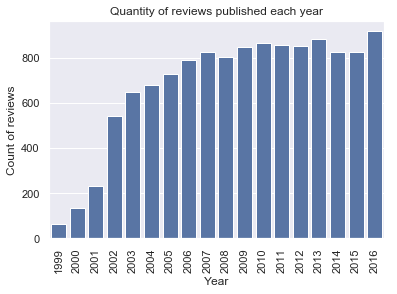

In [3]:
annual_counts = data.groupby('publication_year').count()
annual_counts.review_id.plot(kind='bar')
#print(annual_counts.head())
sns.barplot(x='publication_year', y='review_id', data=annual_counts.reset_index(), color='b')
#sns.lineplot(x='publication_year', y='review_id', data=annual_counts.reset_index(), color='b')
plt.title("Quantity of reviews published each year")
plt.xlabel("Year")
plt.ylabel("Count of reviews")
plt.show()


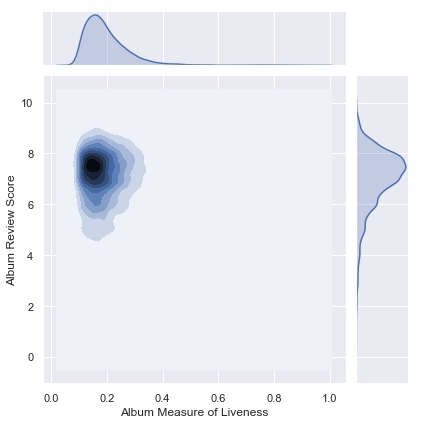

In [13]:
#sns.relplot(x='energy_mean', y='score', data=data)
viz = sns.jointplot(x='liveness_mean', y='score', data=data, kind="kde")
viz.set_axis_labels("Album Measure of Liveness", "Album Review Score")
#plt.xlabel("Album Measure of Liveness")
#plt.ylabel("Album Review Score")
#plt.title("Liveness vs Review Score")
plt.show()

Look at the distribution of reviews over time. Interestingly, the variation appears to diminish over time.

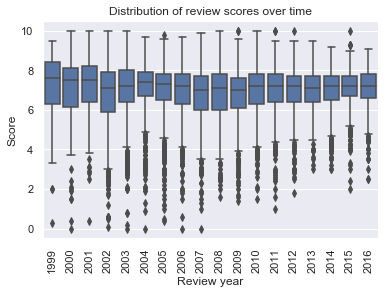

In [5]:
sns.boxplot(x='publication_year', y='score', data=data, color='b')
plt.title('Distribution of review scores over time')
plt.xlabel("Review year")
plt.ylabel("Score")
plt.tick_params(axis='x', rotation=90)
plt.show()

Looking at the album average energy and loudness over time, along with the standard deviations of these metrics. Music has gotten louder and energetic, and the variation of these attributes has decreased over time. Albums have not only gotten louder and more energetic, but songs on albums have gotten more similar to each other in these regards.

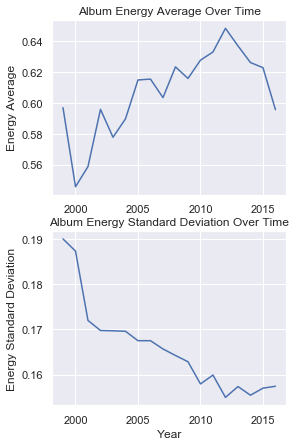

In [6]:
annual_means = data.groupby("release_year").mean()

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,6))
fig.tight_layout()
ax1.plot(annual_means.energy_mean)
ax1.set_title("Album Energy Average Over Time")
ax1.set_ylabel("Energy Average")
ax2.plot(annual_means.energy_std)
ax2.set_title("Album Energy Standard Deviation Over Time")
ax2.set_ylabel("Energy Standard Deviation")
ax2.set_xlabel("Year")
plt.show()

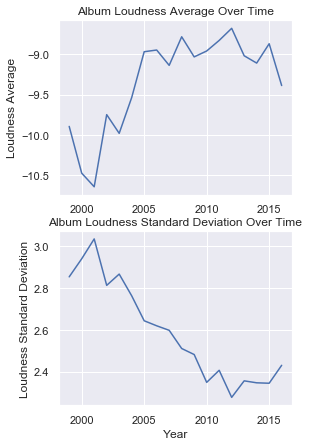

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,6))
fig.tight_layout()
ax1.plot(annual_means.loudness_mean)
ax1.set_title("Album Loudness Average Over Time")
ax1.set_ylabel("Loudness Average")
ax2.plot(annual_means.loudness_std)
ax2.set_title("Album Loudness Standard Deviation Over Time")
ax2.set_ylabel("Loudness Standard Deviation")
ax2.set_xlabel("Year")
plt.show()

Looking at the distribution of keys albums are composed in:

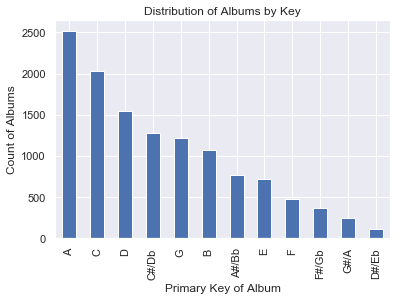

In [8]:
data.primary_key.value_counts().plot(kind='bar', color='b')
plt.xlabel("Primary Key of Album")
plt.ylabel("Count of Albums")
plt.title("Distribution of Albums by Key")
plt.show()

Looking at the distribution of scores by album key:

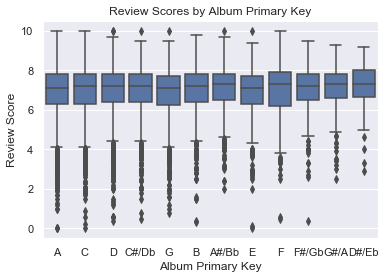

In [9]:
sns.boxplot(x='primary_key', y='score',  data=data, order=["A", "C", "D", "C#/Db", "G", "B", "A#/Bb", "E", "F", "F#/Gb", "G#/A", "D#/Eb"], color='b')
plt.xlabel("Album Primary Key")
plt.ylabel("Review Score")
plt.title("Review Scores by Album Primary Key")
plt.show()

Creating the data to examine the bottom, top, and middle albums:

In [14]:
# what about the perfect scores?
# let us get the top 10 and bottom 10 
masterpieces = data.loc[data.score==10]
print("Number of pefect 10s:", masterpieces.shape[0])

lower_quantile = data.score.quantile(.1)
flops = data.loc[data.score <= lower_quantile]
print("Number of albums at or below", lower_quantile, "-", flops.shape[0])

upper_quantile = data.score.quantile(.9)
classics = data.loc[data.score >= upper_quantile]
print("Number of albums at or above", upper_quantile, '-', classics.shape[0])

regular_albums = data.loc[(data.score > lower_quantile) & (data.score <= upper_quantile)]
print("Number of albums between the two cutoffs -", regular_albums.shape[0])



Number of pefect 10s: 15
Number of albums at or below 5.3 - 1292
Number of albums at or above 8.2 - 1488
Number of albums between the two cutoffs - 9830


Looking at the distribution of album genre in each quality category:

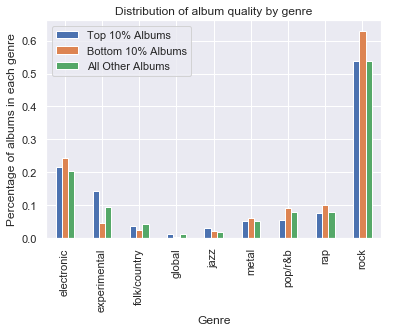

In [15]:
genre_list = ['electronic', 'experimental', 'folk/country', 'global', 'jazz', 'metal', 'pop/r&b', 'rap', 'rock']
classics_genres = classics[genre_list].sum() / classics[genre_list].count()
flops_genres = flops[genre_list].sum() / flops[genre_list].count()
regular_albums_genres = regular_albums[genre_list].sum() / regular_albums[genre_list].count() 

genre_comparison = pd.concat([classics_genres, flops_genres, regular_albums_genres], axis=1)
genre_comparison.columns = ['classics', 'flops', 'normal']

ax = genre_comparison.plot(kind='bar')
ax.legend(['Top 10% Albums', 'Bottom 10% Albums', 'All Other Albums'])
plt.xlabel("Genre")
plt.ylabel("Percentage of albums in each genre")
plt.title('Distribution of album quality by genre')
plt.show()